In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')

# Load Data

In [2]:
# Download data directly from kaggle using opendatasets library
import opendatasets as od
url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(url)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


In [3]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv') 
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


# Data Preparation and Cleaning

In [4]:
df.shape

(2845342, 47)

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [11]:
# Find the numeric data from the dataset
num_df = df.select_dtypes(include=['int', 'float'])

In [12]:
# Find null values
missing = df.isna().sum().sort_values(ascending=False) # gives count of missing values per column
missing_percentages = missing * 100 / len(df)

# Remove stuff with zero percent missing values for visualization
missing_percentages = missing_percentages[missing_percentages != 0]
missing_percentages

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

<AxesSubplot:>

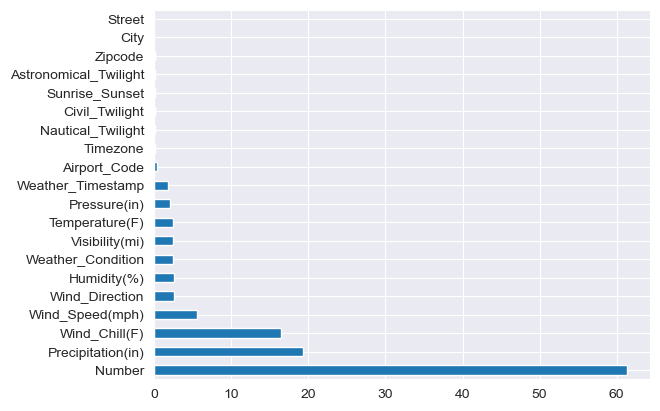

In [13]:
# Hirizontal bar plot to see missing values
missing_percentages.plot(kind='barh')

In [14]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [15]:
# Remove columns that we do not want to use
# Number has too many missing values, hence remove number column
df.drop(['Number'], axis=1)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


### Questions 

1) Dependency on temperature, pressure, visibility, windspeed and precipitation  
2) State having highest accidents also severity according to states
4) Were start and end latitude same, meaning death at that point and their relation with severity  
5) Correlation of severity with the columns  
6) Number represents the street number in address field, there are less counts in number column, does this mean more accidents where no street number? 

7) New York is most populated but why it is not present in top 10 cities by accidents

# Exploratory Analysis and Visualization

Columns to analyse:
1. City
2. Start Time
3. Latitude and Longitude
3. Temperature
4. Severity
5. Visibility

### City

In [16]:
cities = df.City.unique()
print(cities)
len(cities)

['Dublin' 'Dayton' 'Cincinnati' ... 'Clarksdale' 'Bridgeboro'
 'American Fork-Pleasant Grove']


11682

In [17]:
# Find number of accidents in each cities = number of times cities is repeated
# Counting unique occurences of values
cities_accidents = df.City.value_counts()
cities_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [18]:
cities_accidents[:100]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
                ...  
Norwalk          3950
Birmingham       3925
Fremont          3924
Fairfax          3898
Colton           3824
Name: City, Length: 100, dtype: int64

In [19]:
type(cities_accidents)

pandas.core.series.Series

In [20]:
'New York' in df.City # We can say that this does not contain data about New York

False

<AxesSubplot:>

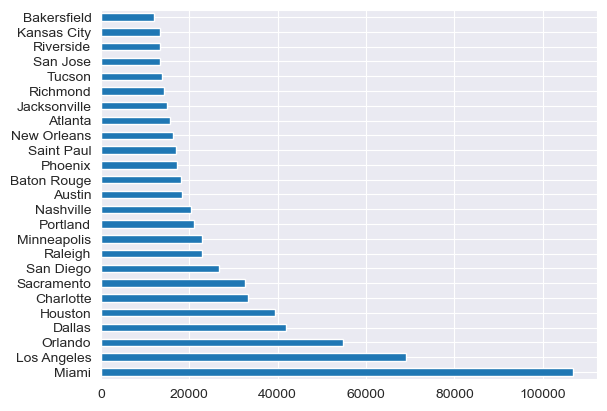

In [21]:
cities_accidents[:25].plot(kind='barh')

C:\Users\Gunratna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

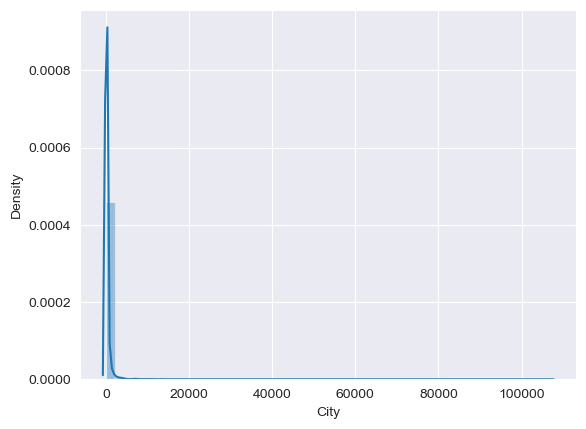

In [22]:
sns.distplot(cities_accidents)
# From this we can see that most cities has low accidents and only few cities have very high accidents

In [23]:
high_accident_cities = cities_accidents[cities_accidents >= 2000]
low_accident_cities = cities_accidents[cities_accidents < 2000]
print('High Accident Cities:', len(high_accident_cities), '&', 'Low Accident Cities:', len(low_accident_cities))
print(len(high_accident_cities)/len(low_accident_cities) * 100)

High Accident Cities: 218 & Low Accident Cities: 11463
1.9017709151182065


C:\Users\Gunratna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

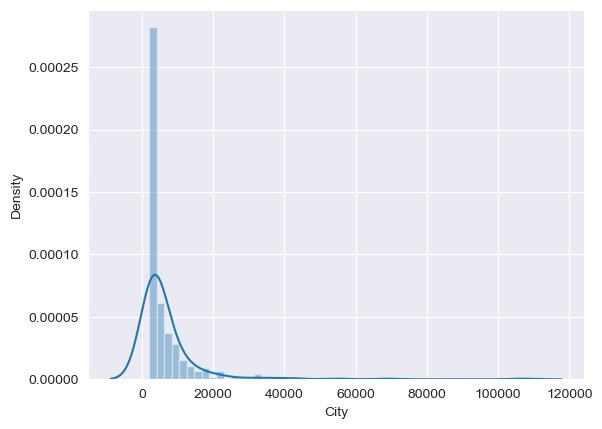

In [25]:
sns.distplot(high_accident_cities)

C:\Users\Gunratna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

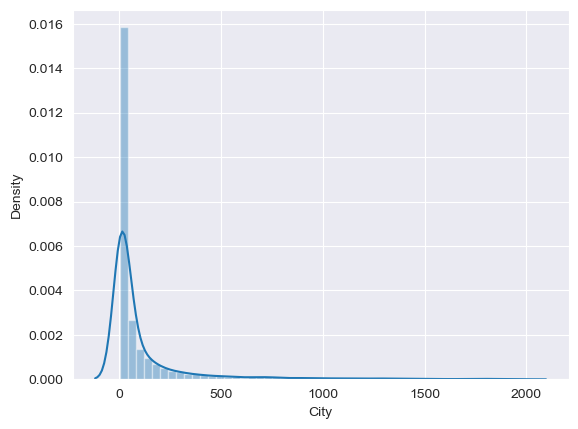

In [26]:
sns.distplot(low_accident_cities)

Both high accident and low accident cities seems to follow an exponentially decreasing distribution, can use log scale to get a clear view of the distribution

<AxesSubplot:xlabel='City', ylabel='Count'>

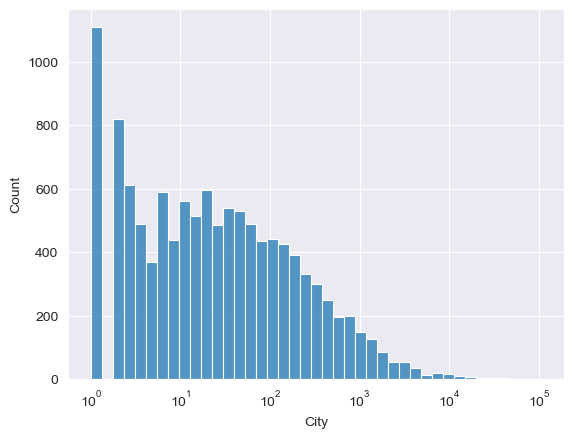

In [27]:
sns.histplot(cities_accidents, log_scale = True)

Here, some cities have zero accidents, that might indicate missing data

In [29]:
cities_accidents[cities_accidents == 1]
# No. of cities with 1, 2, 3, 4 accidents individually is unusually high, might ignore them as there might be some problems in the data
# Very few data about

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

### Time

In [30]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [31]:
# Converting into a Date Time format
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

In [33]:
# Accidents by hour
Hour_accident = df.Start_Time.dt.hour 
Hour_accident.value_counts()[:8] # to see which hour has highest accidents

17    220358
16    218385
15    214264
14    191480
18    168982
13    166473
12    143715
7     135191
Name: Start_Time, dtype: int64

C:\Users\Gunratna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

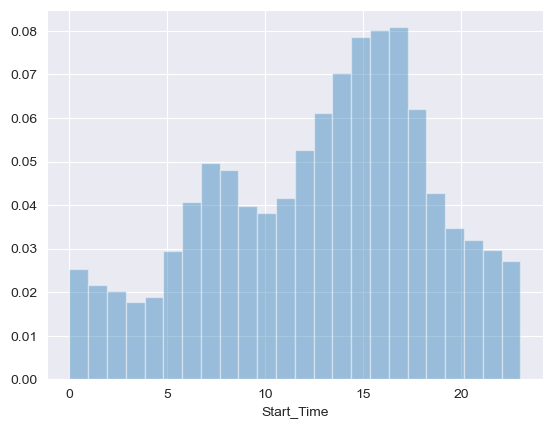

In [34]:
sns.distplot(Hour_accident, bins=24, kde=False, norm_hist=True) # norm_hist to get percentages

<AxesSubplot:xlabel='Start_Time'>

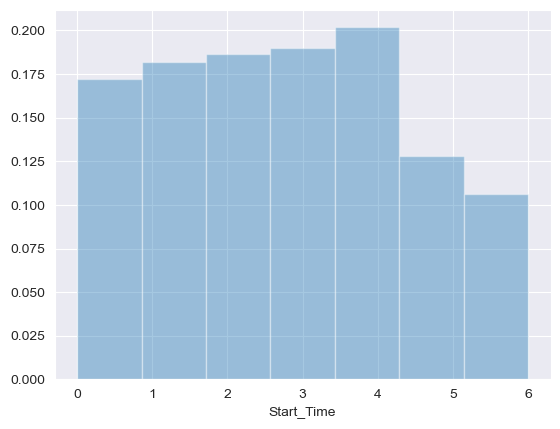

In [35]:
# Accidents by day of the week
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True) # norm_hist to get percentages

In [47]:
# Grab weekends and weekdays in different series and plot
# From Start_Time series, get the Start_Time when dayofweek varies
weekends = df.Start_Time[df.Start_Time.dt.dayofweek >= 5]
weekdays = df.Start_Time[df.Start_Time.dt.dayofweek < 5]
weekends

147       2016-02-13 04:56:20
148       2016-02-13 07:14:41
149       2016-02-13 09:13:49
150       2016-02-13 16:00:59
151       2016-02-13 18:06:41
                  ...        
2843130   2019-08-18 23:24:10
2843169   2019-08-17 03:36:35
2843243   2019-08-18 22:56:56
2843244   2019-08-18 22:56:56
2843282   2019-08-18 22:54:41
Name: Start_Time, Length: 570965, dtype: datetime64[ns]

C:\Users\Gunratna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

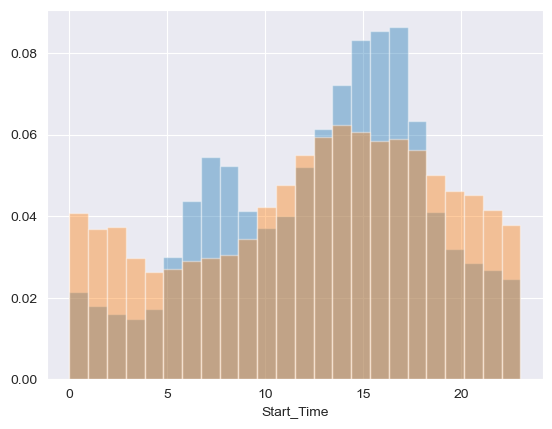

In [48]:
sns.distplot(weekdays.dt.hour, bins=24, kde=False, norm_hist=True)
sns.distplot(weekends.dt.hour, bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

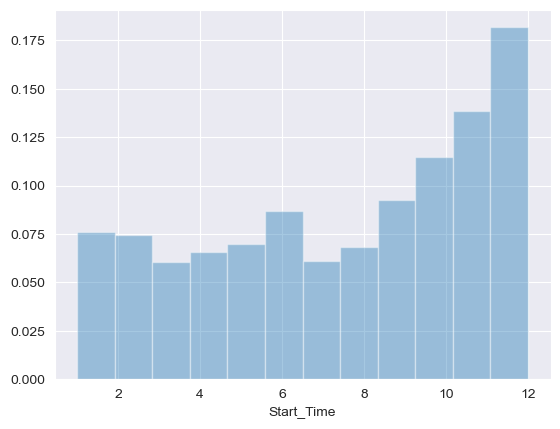

In [51]:
# Analysis by month
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

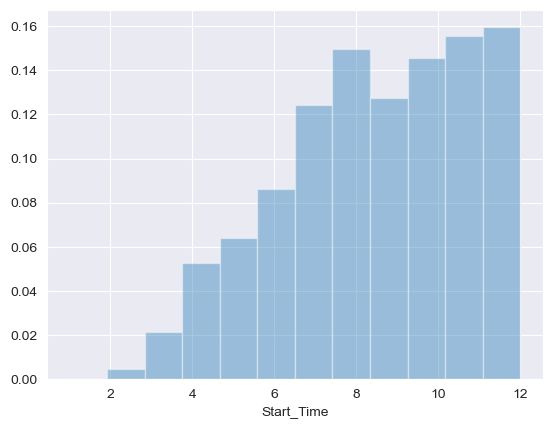

In [67]:
# For specific year
df_year = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

Might be less data during initial months of 2016 which led to plot being skewed towards right

### Latitude and Longitude

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
688991,A-688992,2,2021-09-07 17:42:57,2021-09-07 19:48:30,32.828466,-96.827928,32.830393,-96.826895,0.146,Stationary traffic from Vandelia St to Atwell ...,...,False,False,False,False,False,False,Day,Day,Day,Day
1218752,A-1218753,2,2021-11-23 14:51:00,2021-11-23 16:26:00,30.367981,-81.761144,30.340091,-81.760864,1.927,Incident on I-295 near PRITCHARD RD Drive with...,...,False,False,False,False,False,False,Day,Day,Day,Day
665820,A-665821,2,2021-10-06 14:51:00,2021-10-06 17:03:41.000000000,40.224820,-76.766356,40.222030,-76.783736,0.937,Incident on PA-283 WB near HARRISBURG INTERNAT...,...,False,False,False,False,False,False,Day,Day,Day,Day
35039,A-35040,4,2016-12-12 07:50:17,2016-12-12 13:52:10,40.444030,-75.366785,40.440939,-75.389386,1.207,Closed at Allentown Rd - Road closed due to ac...,...,False,False,True,False,False,False,Day,Day,Day,Day
86280,A-86281,2,2016-07-14 09:49:00,2016-07-14 15:49:00,42.240730,-87.862610,42.240562,-87.862591,0.012,At IL-60/Townline Rd/W Kennedy Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696563,A-2696564,2,2018-02-27 09:18:36,2018-02-27 15:18:36,37.928525,-122.323245,37.926110,-122.321560,0.190,At Cutting Blvd - Accident. Lane blocked.,...,False,False,False,False,False,False,Day,Day,Day,Day
2373633,A-2373634,2,2019-12-31 20:35:00,2019-12-31 21:08:29,40.932195,-123.679005,40.932195,-123.679005,0.000,At CA-96/Bigfoot Scenic Hwy - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
1320357,A-1320358,2,2021-04-27 16:32:00,2021-04-27 18:55:20,34.013353,-117.385918,34.015970,-117.390124,0.301,Accident from Hall Ave to Rubidoux Blvd.,...,False,False,True,False,False,False,Day,Day,Day,Day
2408338,A-2408339,2,2019-10-07 02:38:00,2019-10-07 03:54:27,38.079619,-122.192361,38.079619,-122.192361,0.000,At Columbus Pky/Rose Dr - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


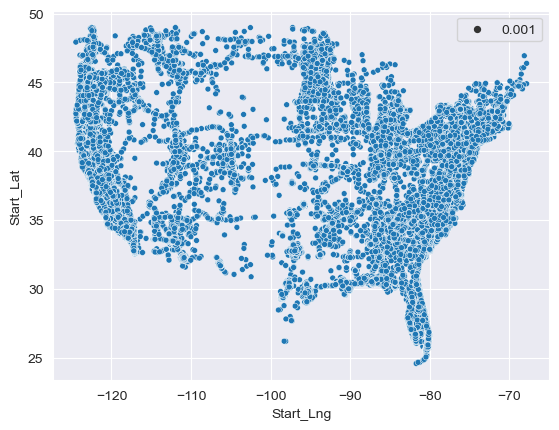

In [134]:
# Longitudes are vertical lines, as it changes we are moving from left to right in map
# x should be longitude to go from left to right and y should be lattitude from top to bottom
sample_df = df.sample(int(5/100 * len(df))) # 20% of the data
sns.scatterplot(x=sample_df.Start_Lng, y=df.Start_Lat, size=0.001)
sample_df

In [132]:
import folium

In [150]:
# get coordinates 
lat, long = list(sample_df.Start_Lat), list(sample_df.Start_Lng)

In [152]:
# map = folium.Map()
# for i in range(1000):
#     marker = folium.Marker((lat[i], long[i]))
#     marker.add_to(map)
# map

### Weather and Severity

C:\Users\Gunratna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature(F)', ylabel='Density'>

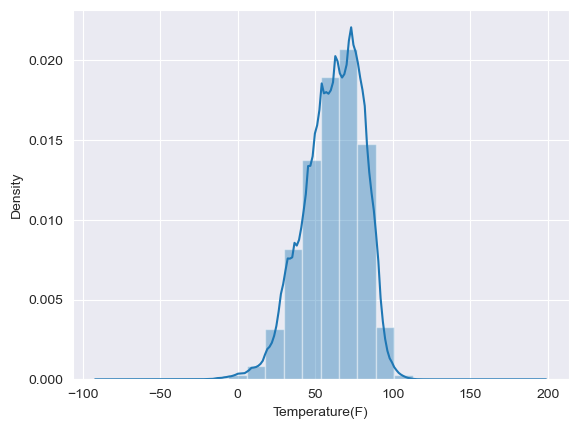

In [186]:
temp_df = df['Temperature(F)'] 
sns.distplot(temp_df, bins=24, norm_hist=True)
# More accidents at high temp??

In [187]:
sevr = df['Severity']
sevr.value_counts()

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

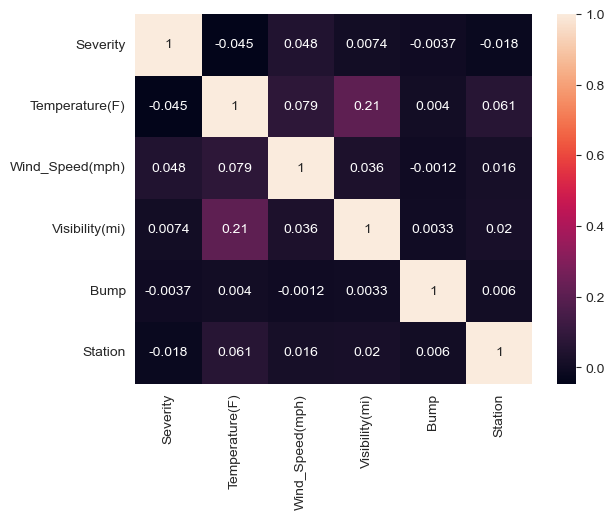

In [189]:
sample_df2 = df[['Severity', 'Temperature(F)', 'Wind_Speed(mph)', 'Visibility(mi)', 'Bump', 'Station']]
corr = sample_df2.corr()

dataplot=sns.heatmap(sample_df2.corr(), annot=True)

# Insights

- No data for New York  
- Number of accidents per city decreases exponentially
- Only 2% of the cities have more than 2000 accidents in a year  
- Around 1100 cities reported only 1 accident, not looking True, something seems unusual (considering this data is for 4 years) 
- High percentage of accidents occur between 1 PM - 5 PM and 6 AM- 10 AM
- Low accidents on weekends as expected
- Higherst accidents in oct, nov and dec -mostly during fall and winter, might be due to people being out to enjoy the weather during winter OR Might be less data during initial months of 2016 which led to plot being  skewed towards right
- Most of the cases are of Severity 2 on a scale of 1 to 4
- Temperature and Severity have negative correlation meaning more severe cases in less or moderate temperature
- Station and Severity have negative correaltion meaning more severe cases where there are no station (1 or 0 values for station)